In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Keras 
import keras

# For creating Sequential ANN model
from keras.models import Sequential
from keras.layers import Dense, Dropout

# For tunning of ANN model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# For encoding categorical values
from sklearn.preprocessing import LabelEncoder

# For spliting of the dataset
from sklearn.model_selection import train_test_split

# For standardizing
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload() 

Saving test.csv to test (3).csv
Saving train.csv to train (2).csv


In [3]:
import io
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [4]:
print(train_df.shape)
train_df.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print(test_df.shape)
test_df.head(10)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0, 0.5, 'Count')

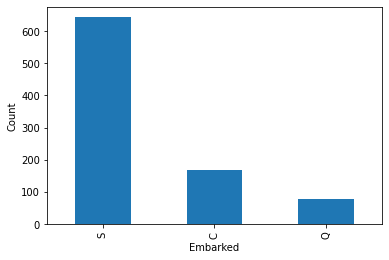

In [8]:
train_df['Embarked'].value_counts().plot.bar()
plt.xlabel('Embarked')
plt.ylabel('Count')

In [9]:
train_df['Embarked'] = train_df['Embarked'].replace(np.nan, 'S')

Text(0, 0.5, 'Count')

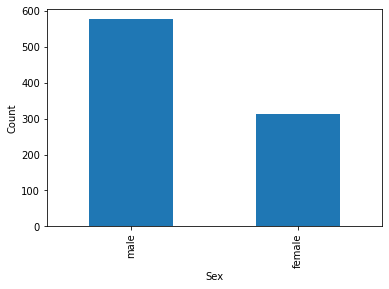

In [10]:
train_df['Sex'].value_counts().plot.bar()
plt.xlabel('Sex')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

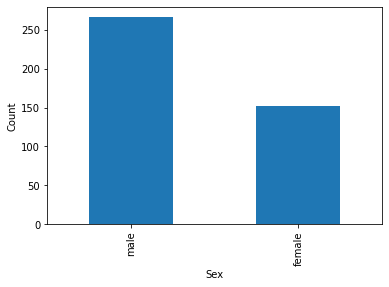

In [11]:
test_df['Sex'].value_counts().plot.bar()
plt.xlabel('Sex')
plt.ylabel('Count')

In [13]:
train_df.Sex.isnull().sum()

0

In [15]:
test_df.Sex.isnull().sum()

0

In [16]:
train_df = train_df.drop('Cabin', axis = 'columns')
test_df = test_df.drop('Cabin', axis = 'columns')

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [20]:
encoder = LabelEncoder()

train_df['Name'] = encoder.fit_transform(train_df['Name'])
train_df['Fare'] = encoder.fit_transform(train_df['Fare'])
train_df['Ticket'] = encoder.fit_transform(train_df['Ticket'])

test_df['Name'] = encoder.fit_transform(test_df['Name'])
test_df['Fare'] = encoder.fit_transform(test_df['Fare'])
test_df['Ticket'] = encoder.fit_transform(test_df['Ticket'])

In [21]:
train_df['Sex'] = train_df['Sex'].replace({'male':1, 'female':0})
train_df['Embarked'] = train_df['Embarked'].replace({'S':0, 'C':1, 'Q':2})

In [22]:
test_df['Sex'] = test_df['Sex'].replace({'male':1, 'female':0})
test_df['Embarked'] = test_df['Embarked'].replace({'S':0, 'C':1, 'Q':2})

In [23]:
train_df['Age'] = train_df['Age'].fillna(int(train_df['Age'].median()))

test_df['Age'] = test_df['Age'].fillna(int(test_df['Age'].median()))

In [24]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,18,0
1,2,1,1,190,0,38.0,1,0,596,207,1
2,3,1,3,353,0,26.0,0,0,669,41,0
3,4,1,1,272,0,35.0,1,0,49,189,0
4,5,0,3,15,1,35.0,0,0,472,43,0
5,6,0,3,554,1,28.0,0,0,275,51,2
6,7,0,1,515,1,54.0,0,0,85,186,0
7,8,0,3,624,1,2.0,3,1,395,124,0
8,9,1,3,412,0,27.0,0,2,344,74,0
9,10,1,2,576,0,14.0,1,0,132,154,1


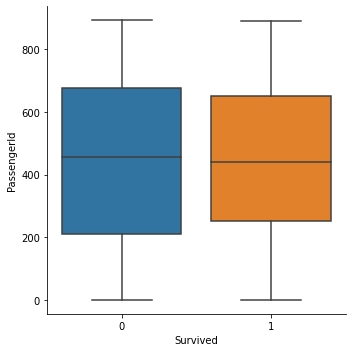

In [25]:
sns.catplot(x = 'Survived', y = 'PassengerId', kind = 'box', data = train_df)

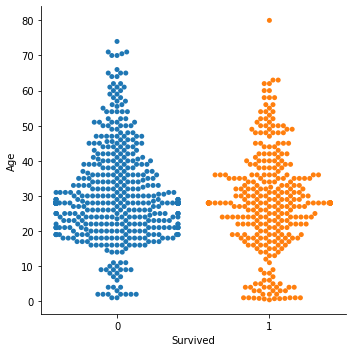

In [26]:
sns.catplot(x='Survived', y = 'Age', kind = 'swarm', data = train_df)

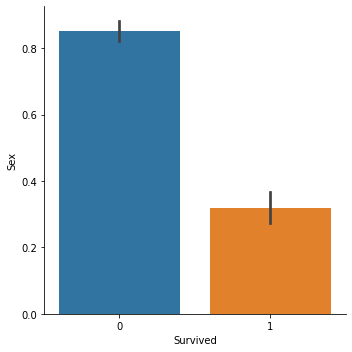

In [27]:
sns.catplot(x='Survived', y = 'Sex', kind = 'bar', data = train_df)

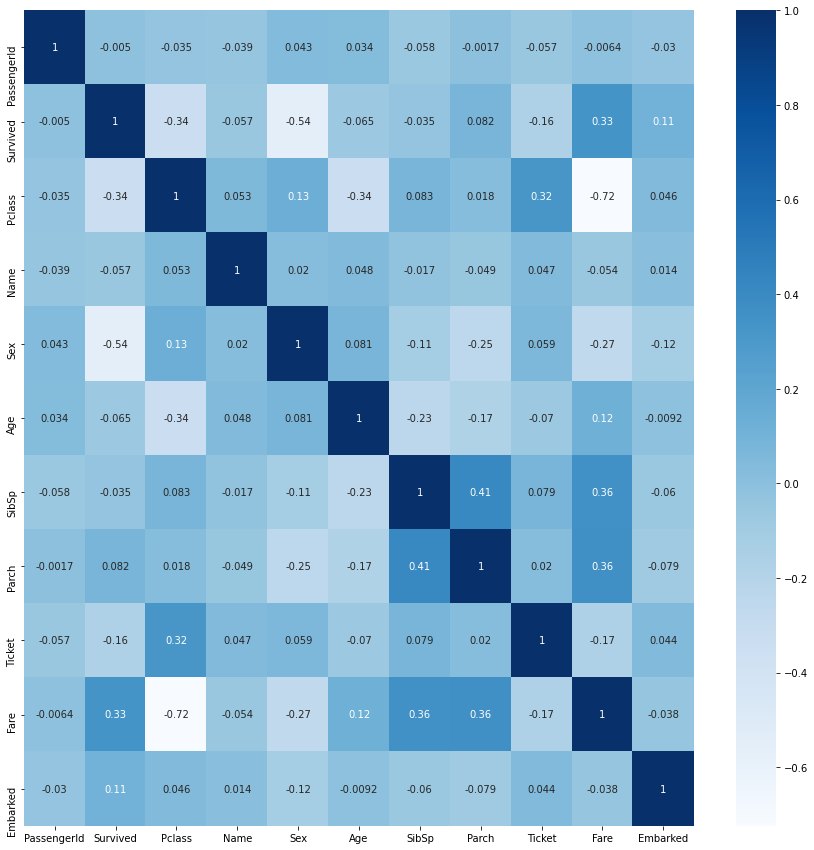

In [28]:
plt.figure(figsize = (15,15))
sns.heatmap(train_df.corr(), annot = True, cmap = 'Blues')

In [29]:
X = train_df.iloc[:, train_df.columns != 'Survived']

In [30]:
y = np.array(train_df['Survived'])
y = y.reshape(-1,1)

**Splitting**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [32]:
print(X_train.shape, X_test.shape)

(668, 10) (223, 10)


**Scaling**

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Creating ANN model.**

In [35]:
model = Sequential()

model.add(Dense(32, input_shape = (10, ), name='Input' ))
model.add(Dense(64, activation = 'elu', name = 'Dense_1'))
model.add(Dense(128, activation = 'elu', name = 'Dense_2'))
model.add(Dropout(0.2))

model.add(Dense(300, activation='elu',  name = 'Dense_3'))
model.add(Dense(500, activation='elu',  name = 'Dense_4'))
model.add(Dense(300, activation='elu', name = 'Dense_5'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='elu',  name = 'Dense_6'))
model.add(Dense(64, activation='elu',  name = 'Dense_7'))
model.add(Dense(32, activation='elu',  name = 'Dense_8'))
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax', name='Output'))


model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 32)                352       
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 300)               38700     
_________________________________________________________________
Dense_4 (Dense)              (None, 500)               150500    
_________________________________________________________________
Dense_5 (Dense)              (None, 300)              

In [38]:
model.fit(X_train, y_train, batch_size = 64, epochs = 50, verbose = 2)

Epoch 1/50
 - 0s - loss: 1.0035 - sparse_categorical_accuracy: 0.6527
Epoch 2/50
 - 0s - loss: 0.5908 - sparse_categorical_accuracy: 0.7515
Epoch 3/50
 - 0s - loss: 0.5444 - sparse_categorical_accuracy: 0.7829
Epoch 4/50
 - 0s - loss: 0.5208 - sparse_categorical_accuracy: 0.7979
Epoch 5/50
 - 0s - loss: 0.5136 - sparse_categorical_accuracy: 0.7964
Epoch 6/50
 - 0s - loss: 0.4979 - sparse_categorical_accuracy: 0.8114
Epoch 7/50
 - 0s - loss: 0.4914 - sparse_categorical_accuracy: 0.7874
Epoch 8/50
 - 0s - loss: 0.4851 - sparse_categorical_accuracy: 0.7964
Epoch 9/50
 - 0s - loss: 0.4933 - sparse_categorical_accuracy: 0.7994
Epoch 10/50
 - 0s - loss: 0.4237 - sparse_categorical_accuracy: 0.8293
Epoch 11/50
 - 0s - loss: 0.4631 - sparse_categorical_accuracy: 0.7994
Epoch 12/50
 - 0s - loss: 0.4401 - sparse_categorical_accuracy: 0.8338
Epoch 13/50
 - 0s - loss: 0.4503 - sparse_categorical_accuracy: 0.7964
Epoch 14/50
 - 0s - loss: 0.4473 - sparse_categorical_accuracy: 0.8054
Epoch 15/50
 - 

In [39]:
model.evaluate(X_test, y_test, batch_size = 64)

223/223 [==============================] - 0s 232us/step


[0.45394951572867254, 0.8161435127258301]

In [55]:
y_pred = model.predict(X_test)

In [56]:
print("X=%s, Predicted=%s" % (X_test[2], y_test[1]))

X=[ 1.52630135  0.80934914 -1.72395919  0.72224656 -0.70246186 -0.46765956
 -0.46887833  1.54070315 -0.90494721 -0.55095985], Predicted=[0]


**Tunning of ANN model**

In [49]:

def build_classifier(optimizer):
  classifier = Sequential()

  classifier.add(Dense(32, input_shape = (10, ), name='Input' ))
  classifier.add(Dense(64, activation = 'elu', name = 'Dense_1'))
  classifier.add(Dense(128, activation = 'elu', name = 'Dense_2'))
  classifier.add(Dropout(0.2))

  classifier.add(Dense(300, activation='elu',  name = 'Dense_3'))
  classifier.add(Dense(500, activation='elu',  name = 'Dense_4'))
  classifier.add(Dense(300, activation='elu', name = 'Dense_5'))
  classifier.add(Dropout(0.2))

  classifier.add(Dense(128, activation='elu',  name = 'Dense_6'))
  classifier.add(Dense(64, activation='elu',  name = 'Dense_7'))
  classifier.add(Dense(32, activation='elu',  name = 'Dense_8'))
  classifier.add(Dropout(0.2))

  classifier.add(Dense(10, activation = 'softmax', name='Output'))

  classifier.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = [keras.metrics.SparseCategoricalAccuracy()])
  
  return classifier

  

In [50]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 50, batch_size = 64, verbose = 2)

In [51]:
parameters = {'batch_size':[32,64],
              'epochs' : [10, 50, 100],
              'optimizer': ['Adam', 'RMSprop']
}

grid = GridSearchCV(estimator = classifier, param_grid = parameters, n_jobs = -1, cv = 3, scoring='accuracy')

In [52]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
 - 0s - loss: 1.0661 - sparse_categorical_accuracy: 0.6856
Epoch 2/50
 - 0s - loss: 0.5862 - sparse_categorical_accuracy: 0.7455
Epoch 3/50
 - 0s - loss: 0.5488 - sparse_categorical_accuracy: 0.7635
Epoch 4/50
 - 0s - loss: 0.5110 - sparse_categorical_accuracy: 0.7904
Epoch 5/50
 - 0s - loss: 0.5249 - sparse_categorical_accuracy: 0.7814
Epoch 6/50
 - 0s - loss: 0.4921 - sparse_categorical_accuracy: 0.7934
Epoch 7/50
 - 0s - loss: 0.4862 - sparse_categorical_accuracy: 0.7904
Epoch 8/50
 - 0s - loss: 0.4484 - sparse_categorical_accuracy: 0.8114
Epoch 9/50
 - 0s - loss: 0.4554 - sparse_categorical_accuracy: 0.8144
Epoch 10/50
 - 0s - loss: 0.4689 - sparse_categorical_accuracy: 0.8024
Epoch 11/50
 - 0s - loss: 0.4413 - sparse_categorical_accuracy: 0.8144
Epoch 12/50
 - 0s - loss: 0.4298 - sparse_categorical_accuracy: 0.8263
Epoch 13/50
 - 0s - loss: 0.4466 - sparse_categorical_accuracy: 0.8114
Epoch 14/50
 - 0s - loss: 0.4089 - sparse_categorical_accuracy: 0.8263
Epoch 15/50
 - 

In [53]:
grid_result.best_params_

{'batch_size': 64, 'epochs': 50, 'optimizer': 'RMSprop'}

In [58]:
print((grid_result.best_score_)*100)

81.58741701342599
